In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import praw
import os
import re
import time
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from string import punctuation
import emoji
from string import punctuation
from collections import Counter, defaultdict
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Luis
[nltk_data]     Perez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from reddit_key import api_key, api_key_secret

In [40]:
user_agent = "example 1.0 by lucho"
reddit= praw.Reddit(
    client_id = api_key,
    client_secret= api_key_secret,
    user_agent = user_agent
)

In [41]:
stock_names2 =['TSLA', 'Tesla', 'Tesla Inc.', 'Tesla Corporation',
               'LYFT', 'Lyft', 'Lyft Inc.', 'Lyft Corporation',
               'BBD', 'Bombardier', 'Bombardier Inc.',
               'F', 'Ford', 'Ford Motor', 'Ford Motor Company',
               'AAPL', 'Apple', 'Apple Inc.',
               'NVDA', 'NVIDIA', 'NVIDIA Corporation',
               'GOOGL', 'Alphabet', 'Alphabet Inc.', 'Google', 'Google Inc.',
               'AMZN', 'Amazon', 'Amazon.com', 'Amazon.com Inc.',
               'AMD', 'Advanced Micro Devices', 'Advanced Micro Devices Inc.',
               'GOOG', 'Alphabet', 'Alphabet Inc.', 'Google', 'Google Inc.',
               'ITUB', 'Itau Unibanco', 'Itau Unibanco Holding', 'Itau Unibanco Holding S.A.',
               'PLTR', 'Palantir Technologies', 'Palantir Technologies Inc.',
               'UBER', 'Uber', 'Uber Technologies', 'Uber Technologies Inc.',
               'CCL', 'Carnival', 'Carnival Corporation', 'Carnival Corporation & plc',
               'AMC', 'AMC Entertainment', 'AMC Entertainment Holdings', 'AMC Entertainment Holdings Inc.',
               'NIO', 'NIO', 'NIO Inc.',    'PYPL', 'PayPal', 'PayPal Holdings', 'PayPal Holdings Inc.',
               'SOFI', 'SoFi Technologies', 'SoFi Technologies Inc.',
               'LUMN', 'Lumen Technologies', 'Lumen Technologies Inc.',
               'PBR', 'Petroleo Brasileiro', 'Petroleo Brasileiro S.A.', 'Petrobras',
               'META', 'MetLife', 'MetLife Inc.',
               'BAC', 'Bank of America', 'Bank of America Corporation',
               'INTC', 'Intel', 'Intel Corporation',
               'CS', 'Credit Suisse', 'Credit Suisse Group',
               'Credit Suisse Group AG',
               'APE', 'AP Eagers', 'AP Eagers Limited']

In [42]:
stock_names4 = ['TSLA', 'Tesla', 'Tesla Inc.', 'Tesla Corporation',
                'PLTR', 'Palantir', 'Palantir Technologies Inc.', 'Palantir Corporation',
                'F', 'Ford', 'Ford Motor', 'Ford Motor Company',
                'NVDA', 'Nvidia', 'Nvidia Corporation', 'AAPL', 'Apple', 'Apple Inc.',
                'AMZN', 'Amazon', 'Amazon.com Inc.', 'AMD', 'Advanced Micro Devices', 
                'GOOGL', 'Google', 'Alphabet Inc.',
                'NU', 'Northeast Utilities', 'ITUB',
                'Itau Unibanco Holding SA',
                'GOOG', 'Uber', 'Uber Technologies Inc.',
                'Uber Corporation',
                'MSFT', 'Microsoft', 'Microsoft Corporation',
                'NIO', 'Nio', 'Nio Inc.', 'Nio Corporation',
                'AMC', 'AMC Entertainment', 'AMC Entertainment Holdings Inc.',
                'CCL', 'Carnival', 'Carnival Corporation',
                'LUMN', 'Lumen', 'Lumen Technologies Inc.',
                'LYFT', 'Lyft', 'Lyft Inc.', 'Lyft Corporation',
                'SNAP', 'Snap', 'Snap Inc.',
                'BAC', 'Bank of America', 'Bank of America Corporation',
                'SOFI', 'SoFi', 'SoFi Technologies Inc.',
                'ABEV', 'AmBev', 'AmBev SA',
                'BBD', 'Bombardier', 'Bombardier Inc.',
                'INTC', 'Intel', 'Intel Corporation',
                'AI', 'Arlington', 'Arlington Asset Investment Corp.',
                'CS', 'Credit Suisse', 'Credit Suisse Group AG',
                'APE', 'Apeel', 'Apeel Sciences Inc.',
                'META', 'Metamaterial', 'Metamaterial Inc.',
                'COIN', 'Coinbase', 'Coinbase Global Inc.',
                'T', 'AT&T', 'AT&T Inc.',
                'AFRM', 'Affirm', 'Affirm Holdings Inc.',
                'SWN', 'Southwestern', 'Southwestern Energy Company',
                'CLF', 'Cleveland', 'Cleveland-Cliffs Inc.', 
                'DNA', 'Sphereon', 'Sphere 3D Corp.', 'GOLD',
                'Barrick', 'Barrick Gold Corporation',
                'GRAB', 'Grab', 'Grab Holdings Inc.',
                'CSCO', 'Cisco', 'Cisco Systems Inc.',
                'PYPL', 'PayPal', 'PayPal Holdings Inc.',
                'SHOP', 'Shopify', 'Shopify Inc.',
                'CMCSA', 'Comcast', 'Comcast Corporation',
                'LCID', 'Lucid', 'Lucid Group Inc.',
                'BTG', 'B2Gold', 'B2Gold Corp.',
                'KO', 'Coca-Cola', 'The Coca-Cola Company',
                'PFE', 'Pfizer', 'Pfizer Inc.',
                'AAL', 'American Airlines', 'American Airlines Group Inc.',
                'BTU', 'Peabody', 'Peabody Energy Corporation',
                'RIVN', 'Rivian', 'Rivian Automotive Inc.',
                'WFC', 'Wells Fargo', 'Wells Fargo & Company',
                'C', 'Citigroup', 'Citigroup Inc.',
                'PBR', 'Petrobras', 'Petroleo Brasileiro SA']

In [43]:
subreddits = ['stockmarket', 'investing', 'wallstreetbets',
              'Wallstreetbetsnew','WallStreetbetsELITE',
              'stocks','StockMarket','investing',
              'SPACs', 'options','Daytrading','Shortsqueeze',
              'SqueezePlays']

In [266]:
# Define regular expression pattern to match stock symbols
symbol_pattern = re.compile(r'\b(' + '|'.join(stock_names4) + r')\b', re.IGNORECASE)

data = {}
seen_headlines = set()
start_time = time.time()

for subreddit in subreddits:
    for post_type in ['hot', 'new']:
        for submission in reddit.subreddit(subreddit).__getattribute__(post_type)(limit=None):
            if submission.title not in seen_headlines and symbol_pattern.search(submission.title):
                seen_headlines.add(submission.title)
                headline_data = {
                    'headline': submission.title,
                    'headline_score': submission.score,
                    'stock_name': symbol_pattern.search(submission.title).group(0),
                    'subreddit_name': subreddit,
                    'comments': []
                }
                submission.comments.replace_more(limit=0)
                comment_counter = 0
                for comment in submission.comments.list():
                    if comment.body and comment.score:
                        headline_data['comments'].append({
                            'comment': comment.body,
                            'comment_score': comment.score
                        })
                        comment_counter += 1
                        if comment_counter >= 50:
                            break
                data[submission.title] = headline_data

end_time = time.time()
run_time = end_time - start_time
print(f"Code run time: {run_time} seconds")


Code run time: 2527.3289425373077 seconds


In [285]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')


In [286]:
df = df.reset_index(drop=True)
df

,headline,headline_score,stock_name,subreddit_name,comments
0,META Summarized News for the week [Feb 19],2,META,stockmarket,[]
1,I’m pretty sure Tesla will be around $600-$800...,1,Tesla,stockmarket,[]
2,Highly Anticipated Earnings 2/21-2/24 🚨 Some b...,1,COIN,stockmarket,[]
3,Being Tricked? I had a realization. Powell can...,951,t,stockmarket,[{'comment': 'More overseas money entered the ...
4,Amazon is still not making a profit...,252,Amazon,stockmarket,[{'comment': 'No they do that on purpose. Rein...
...,...,...,...,...,...
1114,$APRN going to $15+ soon. Don't be bagholding ...,66,t,SqueezePlays,"[{'comment': 'Cashed out at $6.20 today, is it..."
1115,Joseph Sandberg isn't going to rugpull retail ...,27,t,SqueezePlays,[{'comment': '🚀🚀 squeezes coming.. people will...
1116,"People say fundamentally, the $BBBY play hasn'...",41,t,SqueezePlays,[{'comment': 'It’ll probably get pumped slight...
1117,"$BBBY on Reg Sho. ""Volume has been way too hig...",92,t,SqueezePlays,"[{'comment': 'Per u/emlerith: ""No shorting and..."


In [287]:
df.to_csv('reddit_data.csv', index_label=None, encoding='utf-8')

In [291]:
data = pd.read_csv("reddit_data.csv", header=0)
data = pd.DataFrame(data)
print(data.shape)
data.head()

(1119, 6)


,Unnamed: 0,headline,headline_score,stock_name,subreddit_name,comments
0,0,META Summarized News for the week [Feb 19],2,META,stockmarket,[]
1,1,I’m pretty sure Tesla will be around $600-$800...,1,Tesla,stockmarket,[]
2,2,Highly Anticipated Earnings 2/21-2/24 🚨 Some b...,1,COIN,stockmarket,[]
3,3,Being Tricked? I had a realization. Powell can...,951,t,stockmarket,[{'comment': 'More overseas money entered the ...
4,4,Amazon is still not making a profit...,252,Amazon,stockmarket,[{'comment': 'No they do that on purpose. Rein...


In [335]:
# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
add_stopwords = ['comment', 'comment_score','commentscore','comment score']
sw = stopwords.words("english")
sw.extend(new_stopwords)

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

#find the count of emojis within the dataframe
def contains_emoji(s):
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]
    return(len(emojis) > 0)

#remove the stop workds from the dataframe
def remove_stop(tokens) :
    stop_words = set(stopwords.words("english"))
    stop_words.update(add_stopwords)
    return [word for word in tokens if word.lower() not in stop_words]
 
#remove the punctuation from the dataframe
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

#create the tokens by splitting on whitespace
def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    return re.split(whitespace_pattern, text)

#defind the function for preparing the data for the pipeline
def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

In [336]:
#apply the pipeline to the reddit dataframe
reddit_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

#create the tokens column and the number of tokens per column
data["tokens"] = data["comments"].apply(prepare,pipeline= reddit_pipeline)
data["num_tokens"] = data["tokens"].map(len) 
data['has_emoji'] = data["comments"].apply(contains_emoji)
data.head()

,Unnamed: 0,headline,headline_score,stock_name,subreddit_name,comments,tokens,num_tokens,has_emoji
0,0,META Summarized News for the week [Feb 19],2,META,stockmarket,[],[],1,False
1,1,I’m pretty sure Tesla will be around $600-$800...,1,Tesla,stockmarket,[],[],1,False
2,2,Highly Anticipated Earnings 2/21-2/24 🚨 Some b...,1,COIN,stockmarket,[],[],1,False
3,3,Being Tricked? I had a realization. Powell can...,951,t,stockmarket,[{'comment': 'More overseas money entered the ...,"[overseas, money, entered, us, markets, 2021, ...",1140,True
4,4,Amazon is still not making a profit...,252,Amazon,stockmarket,[{'comment': 'No they do that on purpose. Rein...,"[purpose, reinvest, business, loss, theyve, ye...",759,False


In [337]:
#create the descriptive statistics function
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """
    total_types = []
    true_total = []
    num_tokens = 0
    num_unique_tokens = 0
    lexical_diversity = 0.0
    num_characters = 0

    #get unique list of tokens
    for token in tokens:
        #print(token)
        for i in token:
            true_total.append(i)
            num_tokens += 1
            if i in total_types:
                pass
            else:
                total_types.append(i)
                num_unique_tokens += 1
            for character in i:
                num_characters +=1
                
    lexical_diversity = round(num_unique_tokens / num_tokens , 3)
                
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")    

    #collect the 5 most common tokens
    counter_list = Counter(true_total)
    top_5 = counter_list.most_common(5)
    print(top_5)

    return([num_tokens, num_unique_tokens,lexical_diversity,num_characters])

In [338]:
#return the descriptive stats for the reddit data (tokens column)
descriptive_stats(data['tokens'])

There are 366109 tokens in the data.
There are 32317 unique tokens in the data.
There are 2146513 characters in the data.
The lexical diversity is 0.088 in the data.
[('1', 7789), ('2', 4461), ('like', 2607), ('3', 2459), ('would', 1772)]


[366109, 32317, 0.088, 2146513]

<AxesSubplot:xlabel='subreddit_name'>

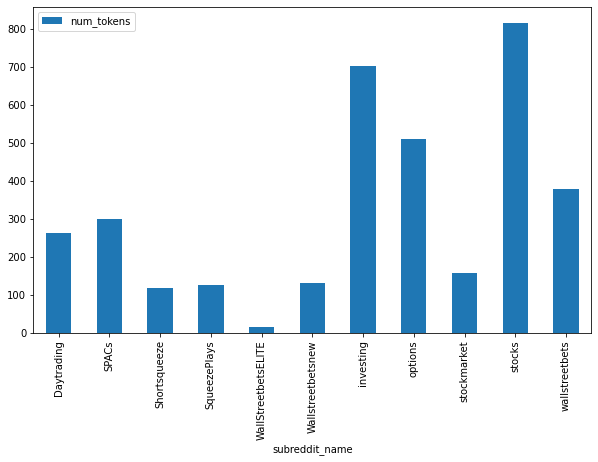

In [339]:
#view the mean wordcount by subreddit
%matplotlib inline
data.groupby('subreddit_name').agg({'num_tokens': 'mean'}).plot.bar(figsize=(10,6))

In [340]:
#create word clouds by subreddit
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [341]:
#create the total reddit wordcloud
reddit_cloud = count_words(data)

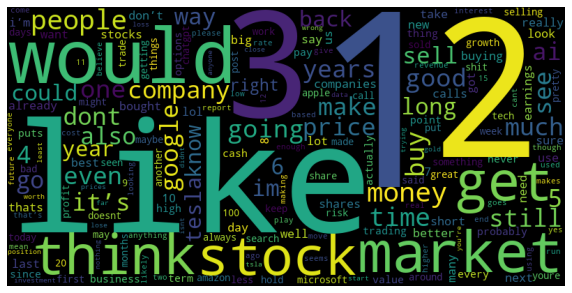

In [342]:
#make the wordcloud larger for better vizability (all subreddits included)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(reddit_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

In [343]:
#create individual dataframes
df_wallstreetbets = data[data['subreddit_name'] == 'wallstreetbets'].copy()
df_stockmarket = data[data['subreddit_name'] == 'stockmarket'].copy()
#df_wallstreetbets.head()

In [344]:
#create the count of words by subreddit
wallst_cloud = count_words(df_wallstreetbets)
stockmk_cloud = count_words(df_stockmarket)

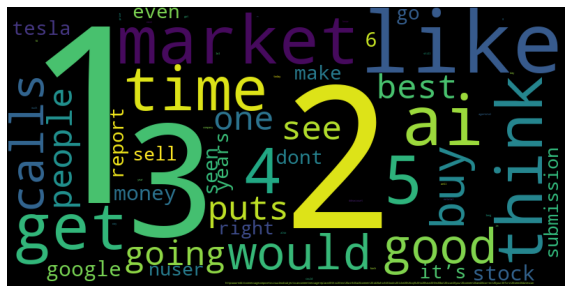

In [345]:
#make the wordcloud larger for better vizability (all subreddits included)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(wallst_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

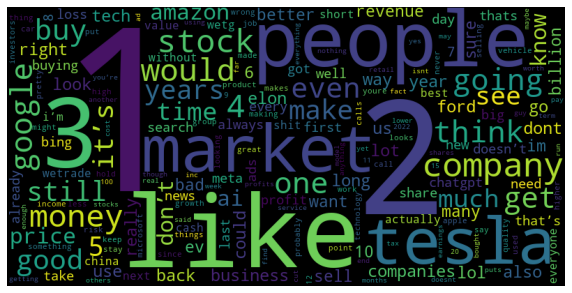

In [346]:
#make the wordcloud larger for better vizability (all subreddits included)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(stockmk_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

In [347]:
def filter_by_type(df, types):
    type_dfs = {}
    for t in types:
        type_dfs[t] = df[df['subreddit'] == t].copy()
    return type_dfs

#filter_by_type(data,subreddits)

In [35]:
def conv_features(text,fw) :
    """Given some text, this returns a dictionary holding the
       feature words.
       
       Args: 
            * text: a piece of text in a continuous string. Assumes
            text has been cleaned and case folded.
            * fw: the *feature words* that we're considering. A word 
            in `text` must be in fw in order to be returned. This 
            prevents us from considering very rarely occurring words.
        
       Returns: 
            A dictionary with the words in `text` that appear in `fw`. 
            Words are only counted once. 
            If `text` were "quick quick brown fox" and `fw` = {'quick','fox','jumps'},
            then this would return a dictionary of 
            {'quick' : True,
             'fox' :    True}
    """
    result = {word: True for word in text if word in fw}
              #word in text.split() for word in fw}
    return result

#conv_features(tokenlist, feature_words)